<a href="https://colab.research.google.com/github/windwindwa/-/blob/master/shap-basic-guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1)Using SHAP to analyze feature importance in machine learning decisions

## 1. Import all required libraries

In [20]:
# In Google Colab, you need to install the SHAP library first
# ! pip install shap

In [1]:
# We use the SHAP library to estimate and visualize Shapley values
import shap

# We use the XGBoost implementation from the xgboost library
import xgboost

# We use this function from the Scikit-learn library to split our dataset into a training dataset and a test dataset
from sklearn.model_selection import train_test_split

# We use this function from the Scikit-learn library to compute the mean squared error of the model's predictions
from sklearn.metrics import mean_squared_error

In [2]:
print(xgboost.__version__)
import sklearn
print(sklearn.__version__)


2.0.1
1.5.2


xgboost and sklearn version is incompitable.
so change the xgboost version to 2.0.1 stable.
and downgrade scikit-learn to 1.5.2 https://stackoverflow.com/questions/79290968/super-object-has-no-attribute-sklearn-tags

In [12]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 93.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


restart Runtime

In [3]:
print(xgboost.__version__)
print(sklearn.__version__)

2.0.1
1.5.2


## 2. Load the sample dataset

Load the California housing dataset (https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

In [4]:
# X is the features and y is the targets
X,y = shap.datasets.california()

Split the dataset into a training dataset and a test dataset, using 80% of the instances for the training dataset and 20% of the instances for the test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 3. Train an XGBoost model

Initialize an XGBoost model for regression tasks

In [6]:

model = xgboost.XGBRegressor()
print(model)  # work

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Train the XGBoost model on the training dataset

In [7]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Make predictions on the test dataset using the XGBoost model

In [9]:
predictions = model.predict(X_test)

Calculate the prediction error for the test dataset using the mean squared error

In [10]:
mse = mean_squared_error(y_test, predictions)
print("MSE: %f" % (mse))

MSE: 0.207833


## 4. Explain the XGBoost model using the SHAP library

## 4.1. Estimate the Shapley values

Initialize an explainer that estimates Shapley values using SHAP

Here we use the training dataset X_train to compute the base value

In [11]:
explainer = shap.Explainer(model=model, masker=X_train)

As you can see below, the Tree SHAP algorithm is used to estimate the Shapley values

Tree SHAP is a method specifically designed for tree models and tree ensembles that estimates Shapley values quickly and accurately.

In [12]:
explainer.__class__

shap.explainers._tree.TreeExplainer

Estimate the Shapley values for the test dataset

In [13]:
shap_values = explainer(X_test)

 99%|===================| 4078/4128 [00:13<00:00]       

## 4.2. Local explanations

Local explanations are explanations for individual predictions of the model

### Waterfall Plot

Visualize the Shapley values for the prediction of the first instance in the test dataset using a waterfall plot

The waterfall plot shows how we get from shap_values.base_values to model.predict(X_test)[0]

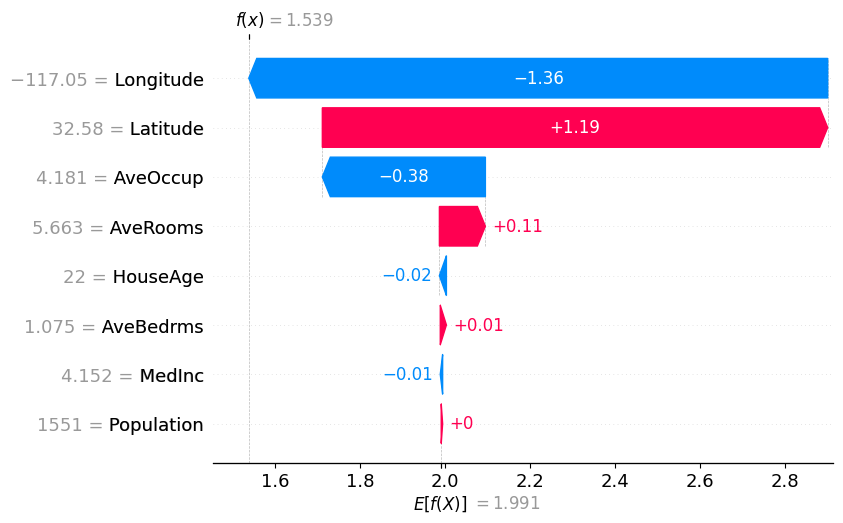

In [14]:
shap.plots.waterfall(shap_values[0])

### Force Plot

For visualizations using force plots, the Javascript library must be loaded

In [15]:
shap.initjs()

Visualize the Shapley values for the prediction of the first instance in the test dataset using a force plot

In [16]:
shap.initjs()
shap.plots.force(shap_values[0])

## 4.3. Global explanations

*Global* explanations describe the overall behavior of the model

### Bar Plot

Visualize the Shapley values for the entire test dataset using a bar plot

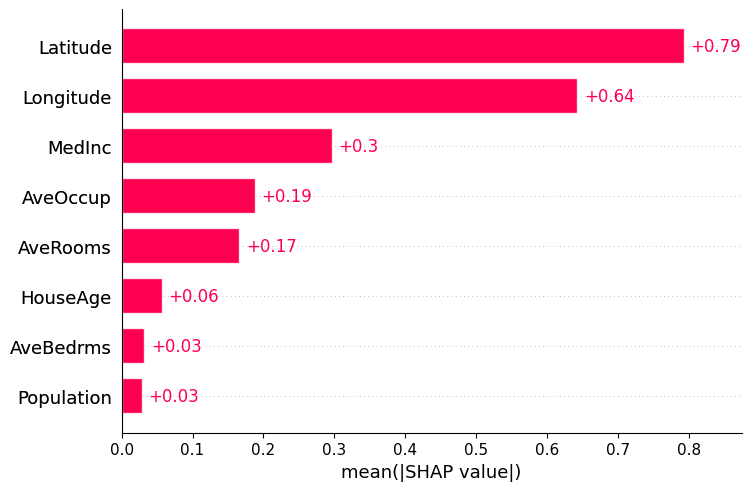

In [17]:
shap.plots.bar(shap_values)

The max_display parameter can be used to set the maximum number of bars to be displayed in the bar plot

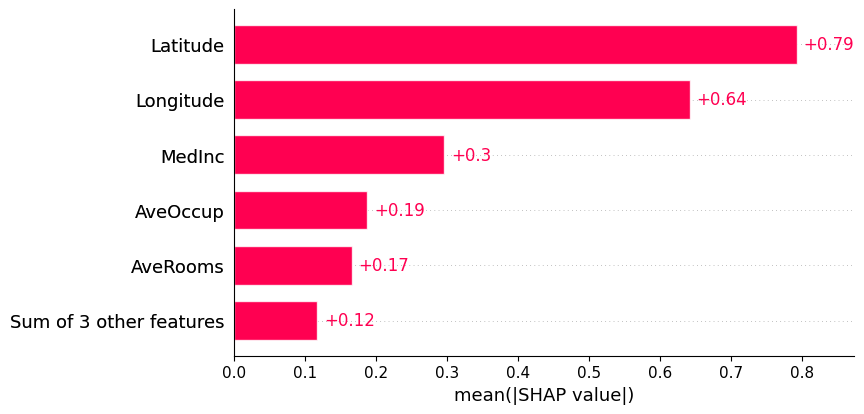

In [18]:
shap.plots.bar(shap_values, max_display=6)

### Beeswarm Plot

Visualize the Shapley values for the entire test dataset using a beeswarm plot

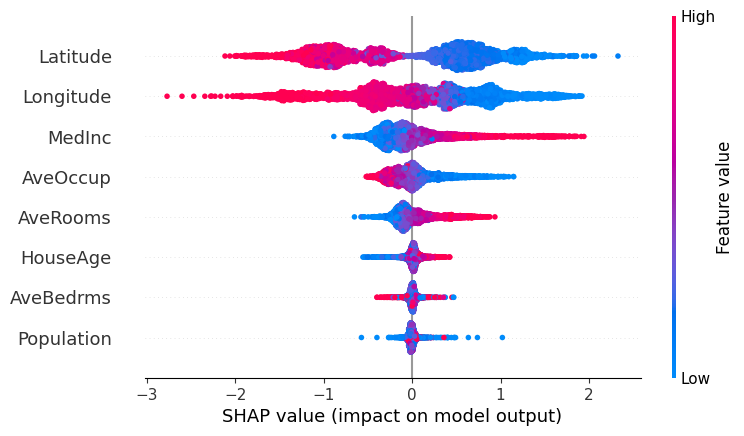

In [19]:
shap.plots.beeswarm(shap_values)

### Force Plot

Visualize the Shapley values for the entire test dataset using a force plot

In [20]:
shap.initjs()
shap.plots.force(shap_values[0:100])

# 2) Try a different dataset

## Repeat steps in 1) to train an XGBoost model A over the Breast Cancer dataset from sklearn library.

### prepare

#### import function

In [47]:
from sklearn.datasets import load_breast_cancer


#### Load the sample dataset

In [48]:
X, y = load_breast_cancer(return_X_y=True)

# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
X,y = sklearn.datasets.load_breast_cancer(return_X_y=True)

### Train an XGBoost model A

In [50]:
model = xgboost.XGBRegressor()
print(model)  # work

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [51]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
predictions = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, predictions)
print("MSE: %f" % (mse))

MSE: 0.043694


## Explain A’s behaviors using SHAP.

#### 4.1. Estimate the Shapley values

Initialize an explainer that estimates Shapley values using SHAP

Here we use the training dataset X_train to compute the base value

In [54]:
explainer = shap.Explainer(model=model, masker=X_train)

As you can see below, the Tree SHAP algorithm is used to estimate the Shapley values

Tree SHAP is a method specifically designed for tree models and tree ensembles that estimates Shapley values quickly and accurately.

In [55]:
explainer.__class__

shap.explainers._tree.TreeExplainer

Estimate the Shapley values for the test dataset

In [56]:
shap_values = explainer(X_test)

In [65]:
print(shap_values[0])

.values =
array([ 4.56800620e-04, -1.25891326e-02, -6.09589620e-05, -1.00794371e-05,
       -2.45576002e-02,  1.00363920e-02, -4.20423703e-03, -1.79069499e-01,
       -1.38142055e-03,  7.62206375e-04, -2.55515055e-02, -1.53347205e-04,
       -4.53829329e-05,  1.67682525e-03,  2.01594422e-05,  1.65701263e-03,
        5.93739646e-03, -3.66953649e-04, -6.81151449e-04, -3.67550886e-03,
        4.49178815e-03, -3.33989946e-02,  6.35883750e-03, -4.74516103e-02,
       -2.24103620e-03, -6.66555036e-03, -1.54962110e-01, -1.23190678e-01,
       -2.60845337e-04, -2.50890813e-03])

.base_values =
0.5899800470085594

.data =
array([1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
       1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
       3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
       1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
       1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01])


#### 4.2. Local explanations

Local explanations are explanations for individual predictions of the model

##### Waterfall Plot

Visualize the Shapley values for the prediction of the first instance in the test dataset using a waterfall plot

The waterfall plot shows how we get from shap_values.base_values to model.predict(X_test)[0]

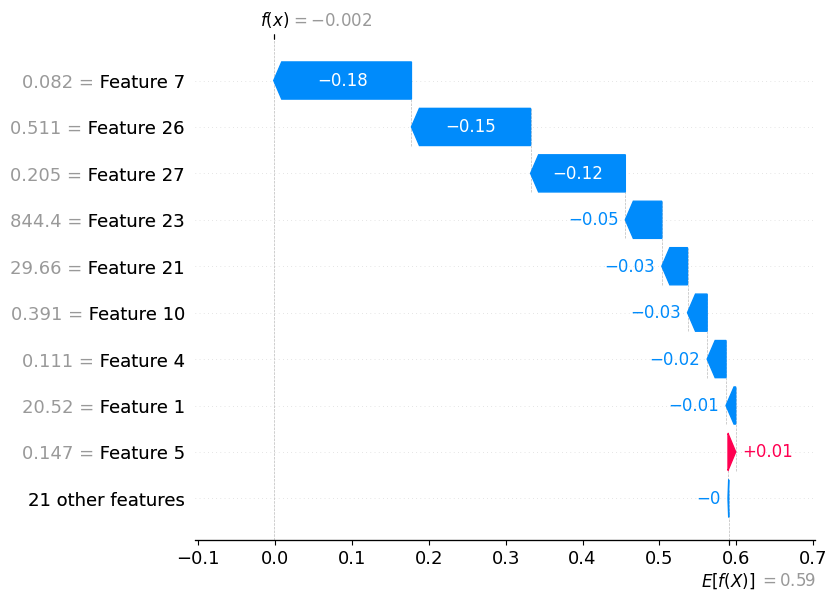

In [58]:
shap.plots.waterfall(shap_values[0])

##### Force Plot

For visualizations using force plots, the Javascript library must be loaded

In [59]:
shap.initjs()

Visualize the Shapley values for the prediction of the first instance in the test dataset using a force plot

In [60]:
shap.initjs()
shap.plots.force(shap_values[0])

#### 4.3. Global explanations

*Global* explanations describe the overall behavior of the model

##### Bar Plot

Visualize the Shapley values for the entire test dataset using a bar plot

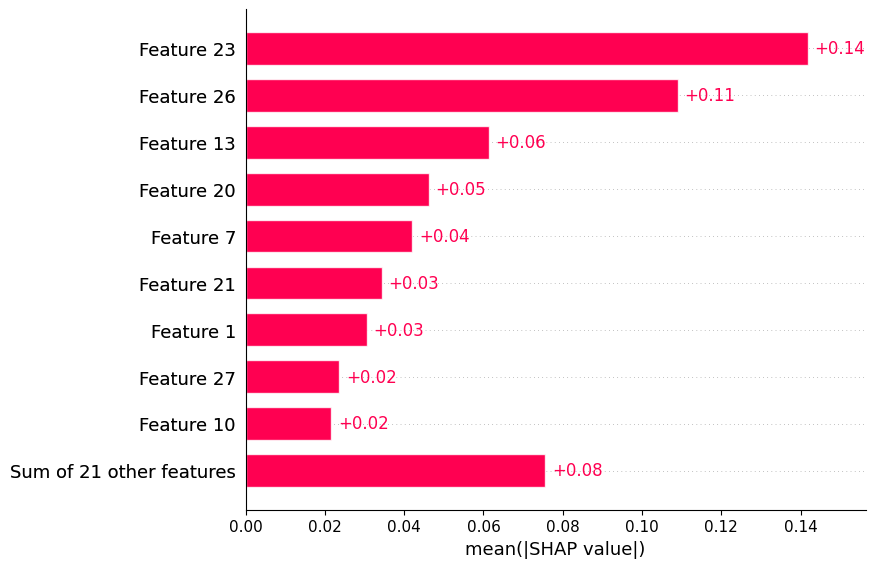

In [61]:
shap.plots.bar(shap_values)

The max_display parameter can be used to set the maximum number of bars to be displayed in the bar plot

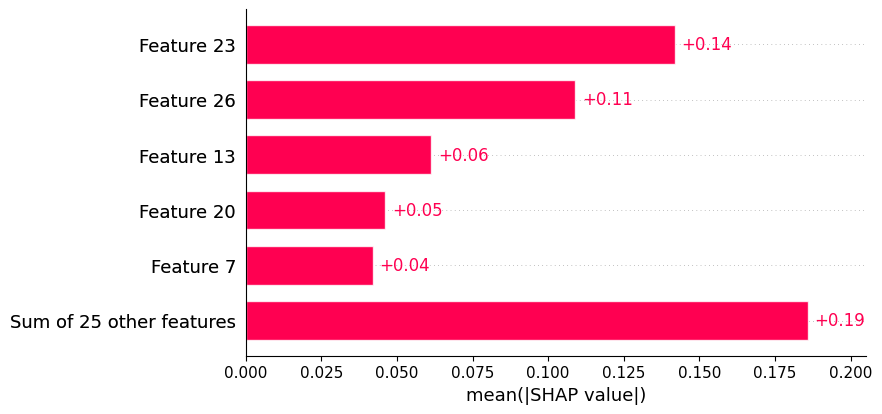

In [62]:
shap.plots.bar(shap_values, max_display=6)

##### Beeswarm Plot

Visualize the Shapley values for the entire test dataset using a beeswarm plot

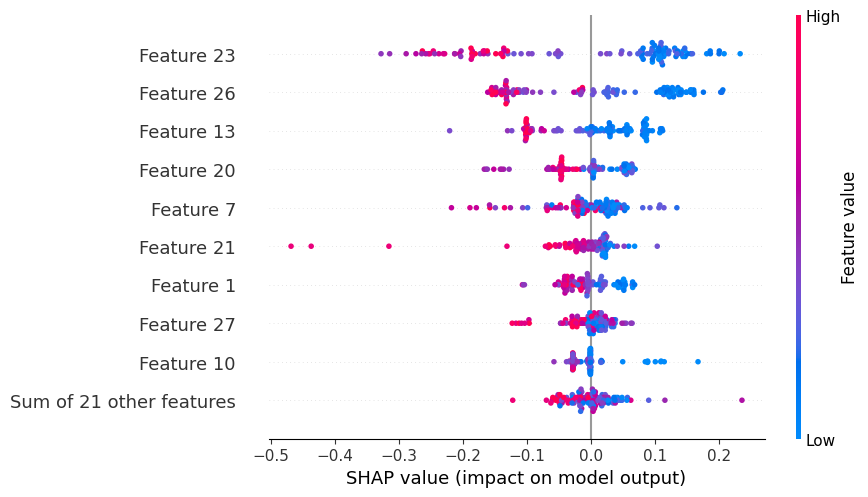

In [63]:
shap.plots.beeswarm(shap_values)

##### Force Plot

Visualize the Shapley values for the entire test dataset using a force plot

In [64]:
shap.initjs()
shap.plots.force(shap_values[0:100])

# 3) Try a different machine learning model

## Train a different tree-based machine learning model B (such as random forest,
decision tree, etc) over the breast cancer dataset

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the breast cancer dataset (classification)
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate using classification metrics
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9649
F1 Score: 0.9722


In [72]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset (classification task)
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree classifier
dt_model = DecisionTreeClassifier(
    max_depth=3,  # Control tree depth to prevent overfitting
    random_state=42
)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}\n")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9474
Precision: 0.9452
Recall: 0.9718
F1 Score: 0.9583

Confusion Matrix:
[[39  4]
 [ 2 69]]


## Explain B’s behaviors using SHAP.

#### 4.1. Estimate the Shapley values

Initialize an explainer that estimates Shapley values using SHAP

Here we use the training dataset X_train to compute the base value

In [73]:
explainer = shap.Explainer(model=model, masker=X_train)

As you can see below, the Tree SHAP algorithm is used to estimate the Shapley values

Tree SHAP is a method specifically designed for tree models and tree ensembles that estimates Shapley values quickly and accurately.

In [74]:
explainer.__class__

shap.explainers._tree.TreeExplainer

Estimate the Shapley values for the test dataset

In [75]:
shap_values = explainer(X_test)

In [76]:
print(shap_values[0])

.values =
array([[-0.01188548,  0.01188548],
       [-0.00620714,  0.00620714],
       [-0.00916357,  0.00916357],
       [-0.01794548,  0.01794548],
       [-0.00068667,  0.00068667],
       [-0.00512833,  0.00512833],
       [-0.01126809,  0.0112681 ],
       [-0.04002143,  0.04002143],
       [-0.00187833,  0.00187833],
       [-0.00103905,  0.00103905],
       [-0.00513929,  0.00513929],
       [-0.00291071,  0.00291071],
       [-0.00145333,  0.00145333],
       [-0.01330667,  0.01330667],
       [ 0.00027   , -0.00027   ],
       [-0.00760571,  0.00760571],
       [ 0.006485  , -0.006485  ],
       [ 0.0003719 , -0.0003719 ],
       [-0.00147738,  0.00147738],
       [ 0.00106357, -0.00106357],
       [-0.03568286,  0.03568286],
       [-0.01271   ,  0.01271   ],
       [-0.03718786,  0.03718786],
       [-0.06176738,  0.06176738],
       [ 0.00388667, -0.00388667],
       [-0.00800262,  0.00800262],
       [-0.0088819 ,  0.0088819 ],
       [-0.06106762,  0.06106762],
       [ 0

#### 4.2. Local explanations

Local explanations are explanations for individual predictions of the model

##### Waterfall Plot

Visualize the Shapley values for the prediction of the first instance in the test dataset using a waterfall plot

The waterfall plot shows how we get from shap_values.base_values to model.predict(X_test)[0]

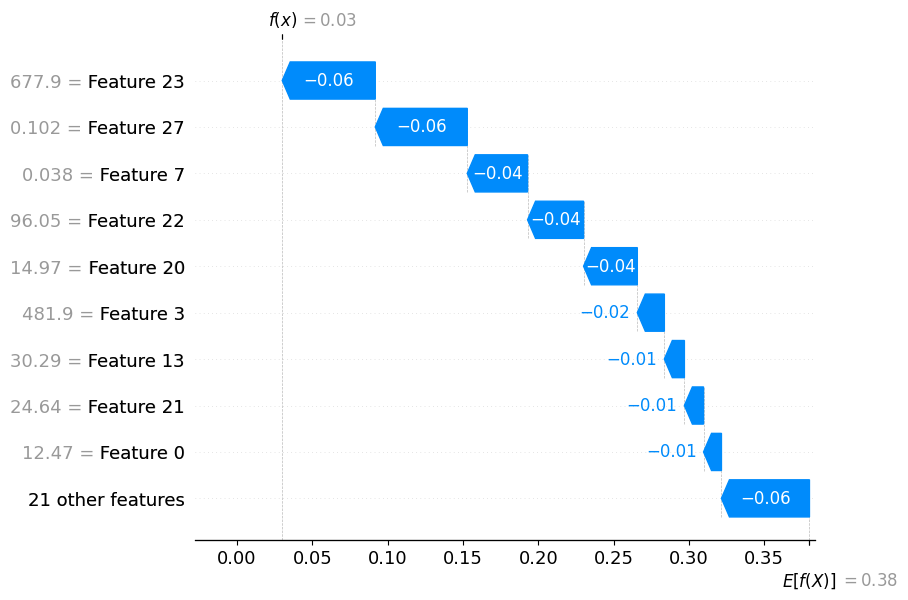

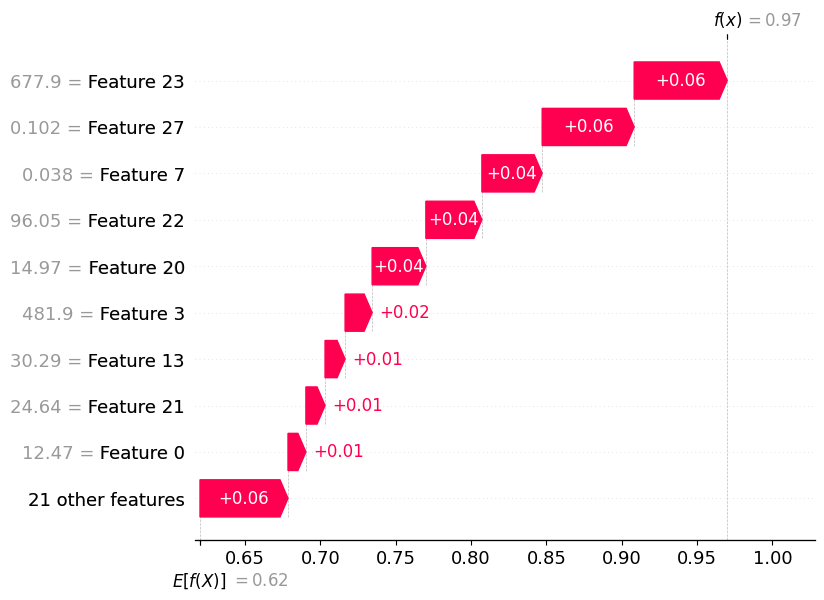

In [79]:
# Assuming you want to visualize the SHAP values for the first model output (index 0):
shap.plots.waterfall(shap_values[0][:, 0])  # Select all features and the first output dimension

# Or, if you want to visualize the SHAP values for the second model output (index 1):
shap.plots.waterfall(shap_values[0][:, 1])  # Select all features and the second output dimension

In [78]:
# shap.plots.waterfall(shap_values[0])

TypeError: only length-1 arrays can be converted to Python scalars

##### Force Plot

For visualizations using force plots, the Javascript library must be loaded

In [80]:
shap.initjs()

Visualize the Shapley values for the prediction of the first instance in the test dataset using a force plot

In [84]:
# shap.initjs()
# shap.plots.force(shap_values[0])
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[0].values[..., 0])  # Assuming a multi-output model


#### 4.3. Global explanations

*Global* explanations describe the overall behavior of the model

##### Bar Plot

Visualize the Shapley values for the entire test dataset using a bar plot

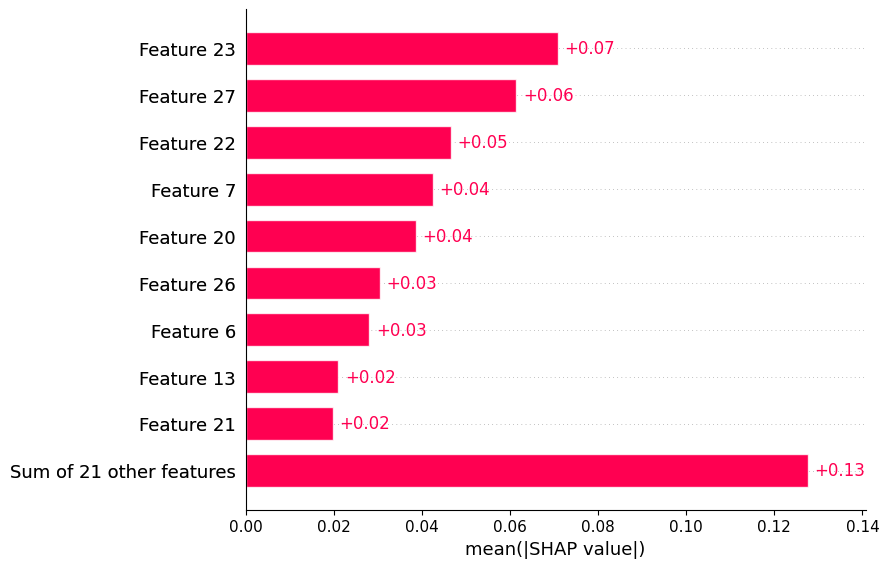

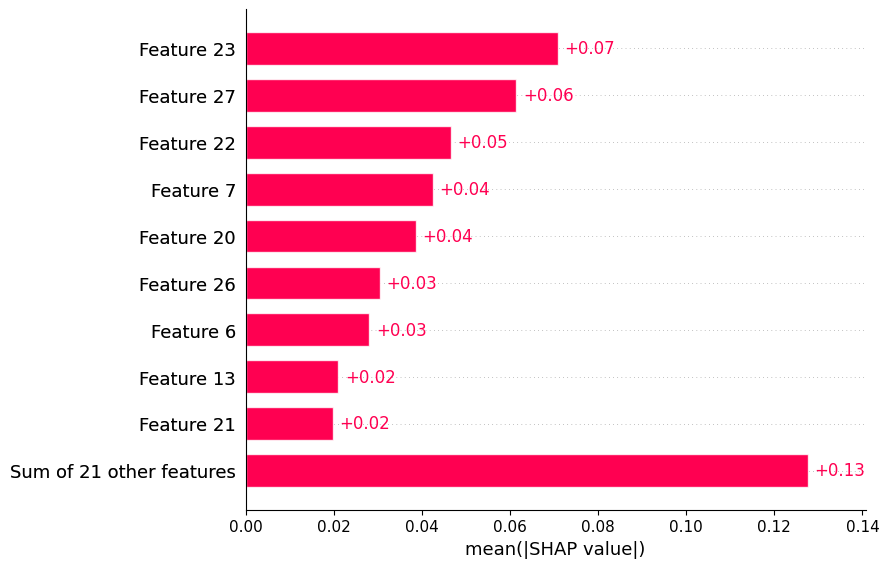

In [86]:
# shap.plots.bar(shap_values)
shap.plots.bar(shap_values[:, :, 0]) # Select the SHAP values for the first class
# or
shap.plots.bar(shap_values[:, :, 1]) # Select the SHAP values for the second class

The max_display parameter can be used to set the maximum number of bars to be displayed in the bar plot

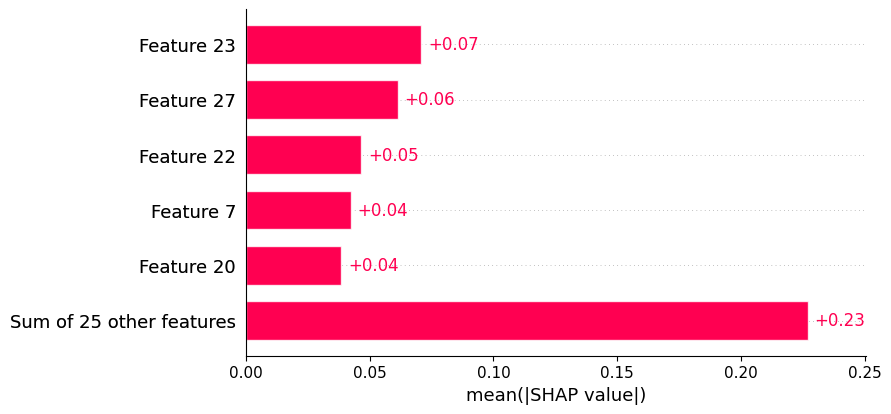

In [88]:
# shap.plots.bar(shap_values, max_display=6)

shap.plots.bar(shap_values[:, :, 0], max_display=6)  # For the first class (index 0)


##### Beeswarm Plot

Visualize the Shapley values for the entire test dataset using a beeswarm plot

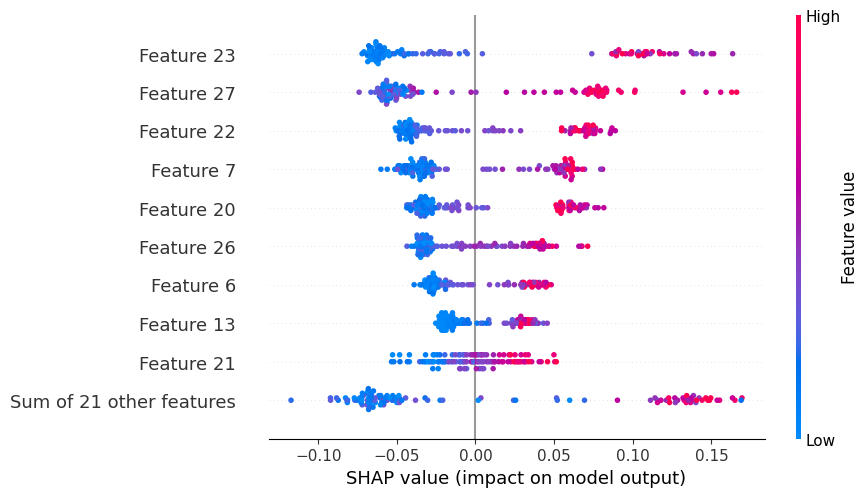

In [91]:
# shap.plots.beeswarm(shap_values)
shap.plots.beeswarm(shap_values[:, :, 0])


##### Force Plot

Visualize the Shapley values for the entire test dataset using a force plot

In [92]:
shap.initjs()
# shap.plots.force(shap_values[0:100])
shap.plots.force(explainer.expected_value[0], shap_values[0:100].values[..., 0])  # Corrected: Added base value for multi-output model


# 4) Compare SHAP’s outcome on A and B

- Look at the SHAP values of the first instance in your training dataset on A and B. Do they agree on the importance of features?
  - They don't agree with each other, but they are consistent in general. The values of the specific features are different.  
- Look at the mean(|SHAP value|) on bar graph of A and B. Do they agree with each other?
  - The same as above. They don't agree with each other, but they are consistent in general. The values of the specific features are different.
  1. For example, for feature 23, both are the first, but one is 0.14 and the other is 0.07.
  2. The second-ranked feature has changed. One is feature 26 and the other is feature 27.  
- If A’s explanation and B’s explanation do not agree with each other, what is the possible reason?
  - I think it's because the explanations of the two models are inconsistent, so the SHAP of XGBoost and the decision tree are different. Moreover, the differences in the model structures lead to differences in the SHAP calculation methods. (One outputs a single SHAP value matrix, and the other outputs two matrices)  
- Given your observation in step 4), in your opinion, what potential challenges we may have for using SHAP in real-world applications?
  - Based on the above observations,I think there may be the same type of task, but due to different models, the explanations of the importance of labels are inconsistent.
  - Also, the inconsistency of SHAP values may be a problem with the samples, resulting in incorrect judgment results.
  - Furthermore, the time complexity of SHAP is relatively high. In large-scale tasks, the computational complexity is a big problem.